In [1]:
import pandas as pd

df_11am = pd.read_csv('Day-ahead Prices_Resampled.csv')

#Column Names
column_headers = list(df_11am)
print(column_headers)

['Time', 'Day-ahead Price [EUR/MWh]']


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df_11am = pd.read_csv('Day-ahead Prices_Resampled.csv')


df_11am['Time'] = pd.to_datetime(df_11am['Time'], format = '%d/%m/%Y %H:%M')
df_11am = df_11am.set_index('Time')


# Display first few rows of the dataframe
print(df_11am.head())


ValueError: time data '2018-09-30 11:00:00' does not match format '%d/%m/%Y %H:%M' (match)

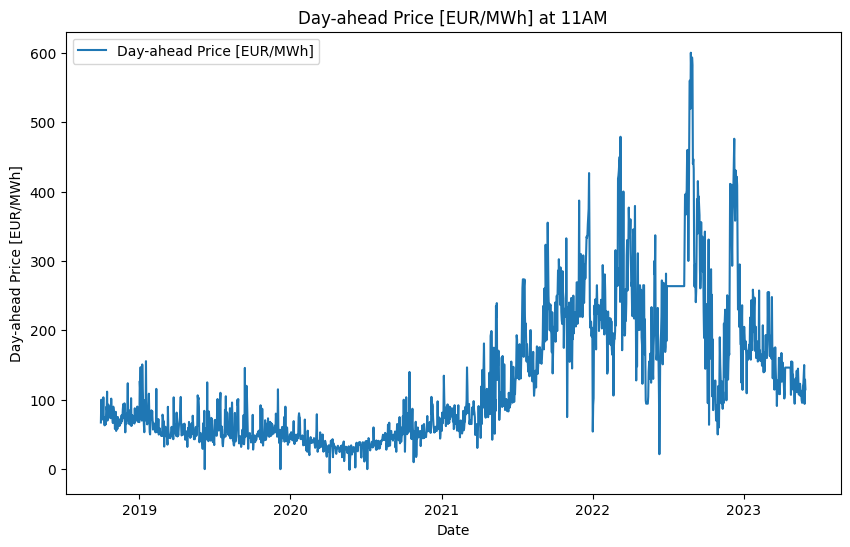

In [4]:

# Plot the time series
plt.figure(figsize=(10,6))
sns.lineplot(data=df_11am)
plt.title('Day-ahead Price [EUR/MWh] at 11AM')
plt.xlabel('Date')
plt.ylabel('Day-ahead Price [EUR/MWh]')
plt.show()



In [ ]:
# Display descriptive statistics
print(df_11am.describe())


In [ ]:
# Check for duplicates
duplicates = df_11am.duplicated(subset=['Day-ahead Price [EUR/MWh]'], keep=False)
print(f"Number of duplicated rows: {duplicates.sum()}")


In [ ]:
# Filter for 2022-2023
df_2022_2023 = df_11am.loc['2022-01-01':'2023-12-31']

# Plot the time series for 2022-2023
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2022_2023)
plt.title('Day-ahead Price [EUR/MWh] at 11AM (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Day-ahead Price [EUR/MWh]')
plt.show()


In [ ]:
# Print out the data for July and September 2022
#print(df_11am.loc['2022-06-28':'2022-08-12'])

print("")

print(df_11am.loc['2022-06-29':'2022-08-10'])



#  From  2022-07-01 11:00:00       263.66 Till  10/08/2022 11:00	263.66, missing values filled with 263,66

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the dataset
df_11am = pd.read_csv('Day-ahead Prices_Resampled.csv')

# Convert 'Time' column to datetime and set it as index
df_11am['Time'] = pd.to_datetime(df_11am['Time'], format='%d/%m/%Y %H:%M')
df_11am = df_11am.set_index('Time')

# Filter for the missing period
start_date = pd.to_datetime('2022-06-29 11:00:00')
end_date = pd.to_datetime('2022-08-10 11:00:00')
missing_period = df_11am.loc[start_date:end_date]

# Get the available data before and after the missing period
before_missing = df_11am.loc[:start_date]
after_missing = df_11am.loc[end_date:]

# Train a linear regression model using the available data
X_train = np.arange(len(before_missing)).reshape(-1, 1)
y_train = before_missing['Day-ahead Price [EUR/MWh]']
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values using the trained model
X_pred = np.arange(len(before_missing), len(before_missing) + len(missing_period)).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Create a new DataFrame with the predicted values
predicted_values = pd.DataFrame(data=y_pred, index=missing_period.index, columns=['Day-ahead Price [EUR/MWh]'])

# Concatenate the available data with the predicted values
estimated_data = pd.concat([before_missing, predicted_values, after_missing])

# Plot the estimated data
plt.figure(figsize=(10, 6))
plt.plot(estimated_data.index, estimated_data['Day-ahead Price [EUR/MWh]'])
plt.title('Estimated Day-ahead Price [EUR/MWh] at 11AM')
plt.xlabel('Date')
plt.ylabel('Day-ahead Price [EUR/MWh]')
plt.show()


# Store the predicted values in a list
predicted_values_list = list(y_pred)

# Print the predicted values
print(predicted_values_list)
